In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [2]:
# Example dataset
X = np.random.rand(100, 1) * 10  # Feature: Random numbers between 0 and 10
y = 3 * X.flatten()**2 - 2 * X.flatten() + 1 + np.random.randn(100) * 5  # Quadratic relationship with noise


In [5]:
X.shape, y.shape

((100, 1), (100,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: Scale the features
    ('poly', PolynomialFeatures()),            # Step 2: Generate polynomial features
    ('model', LinearRegression())              # Step 3: Apply linear regression
])


In [10]:
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],           # Test different polynomial degrees
    'model__fit_intercept': [True, False]      # Example of tuning another parameter
}

# Use GridSearchCV for tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [11]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MSE:", grid_search.best_score_)

# Test set evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Mean Squared Error:", mean_squared_error(y_test, y_pred))


Best Parameters: {'model__fit_intercept': False, 'poly__degree': 2}
Best Negative MSE: -24.94835498325476
Test Set Mean Squared Error: 26.753599215982092


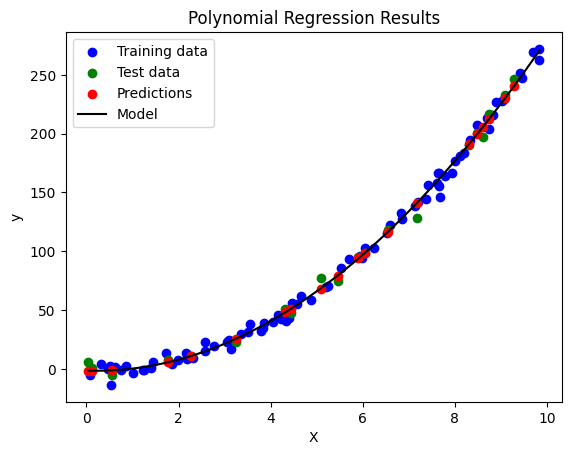

In [13]:
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predictions
plt.scatter(X_test, y_pred, color='red', label='Predictions')

# Plot the line result
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = best_model.predict(X_line)
plt.plot(X_line, y_line, color='black', label='Model')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Results')
plt.show()

In [15]:
# Access the linear regression model within the pipeline
linear_regression_model = best_model.named_steps['model']

# Get the coefficients
coefficients = linear_regression_model.coef_

# Get the intercept (bias term)
intercept = linear_regression_model.intercept_

# Print the coefficients and intercept
print("Model Coefficients:", coefficients)
print("Model Intercept (Bias Term):", intercept)

Model Coefficients: [67.02928127 82.06396375 24.53926807]
Model Intercept (Bias Term): 0.0
